# Prediction for stage 1 of landing of Falcon 9



## capstone project
**Business Problem:** It will be predicted if the first stages of falcon 9 is usable again or not. so we should be sure if the landing is successful or not. It is important to know the reusibility of stages because the cost of landing of other providers are about 165 million dollar however Space X spends about 62 and defintely it will be useful for new entrance.
the data will be collected from API.
the problem is classification supervised learning.

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class Y
*   Standardize the data X
*   Split into training data and test data

Find tuned Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method by using grid search for test data 

In [120]:
#import the library of request for collecting data from API and 
import requests
#  for data manipulation and analysis
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

#for visulization
import seaborn as sns
import matplotlib.pyplot as plt
# for cleansing
from sklearn.preprocessing import LabelEncoder
#slpit dataset
from sklearn.model_selection import train_test_split
#standardization

from sklearn import preprocessing
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#optimizated parameters
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


In [2]:
def heat_confusion(ytest,pre):
    cm=confusion_matrix(ytest,pre)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

##### request launch data from SpaceX API with URL:


In [2]:
responses=requests.get("https://api.spacexdata.com/v4/launches/past")
responses

<Response [200]>

In [3]:
# check the contents
responses.content

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [4]:
type(responses)

requests.models.Response

In [5]:
# decode the responces from request model to json
responses.json()

[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [6]:
#convert json model to pandas dataframe
df=pd.json_normalize(responses.json())
df

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


In [3]:
df=pd.read_csv("dataset_falcon9 (4).csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [165]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

### Exploratory data analysis(EDA)
This phase is important to figure out the data undrestanding, for last column "Class" it is our target and shows the success of langing if it is equal to one otherwise it is zero. Regarding to other features which have impact on it we want to predict 1 or 0. 

Orbit is considered as informative column to predict. it includes the data of entering rockets to which orbits.
Launchsite is the loction of landing.
Outcome/True are the successful category.

We can omit thses 3 columns:
* LaunchSite, Latitude and Longitude are meaning the same. so it is possible to keep just one of them. rember all the time we should just keep one of the same columns and remove the others.infact they the same value.
* Boosterversion is identical for all flightnumbers.
* Serial do not give particular information.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

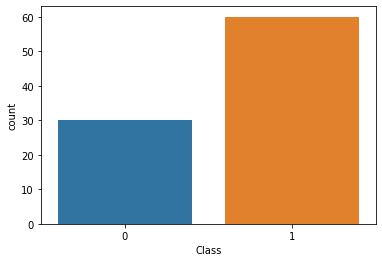

In [5]:

sns.countplot(df['Class'])


In [6]:
#
bool_features=df.dtypes==bool
bool_features = df.columns[bool_features].tolist()
bool_features

['GridFins', 'Reused', 'Legs']

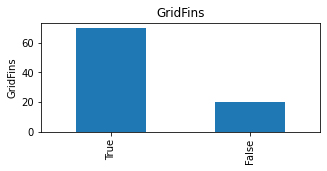

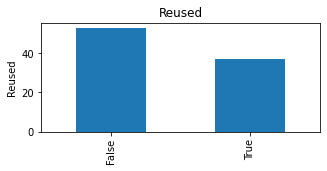

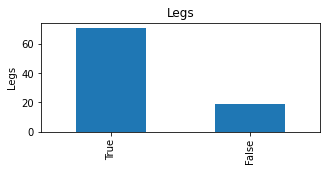

In [7]:
for i in range(len(bool_features)):
    df[bool_features[i]].value_counts().plot(kind='bar',subplots=True,figsize=(5,2))
    plt.xticks(rotation='vertical')
    plt.ylabel(bool_features[i]) 
    plt.show()


In [8]:
df=df.drop('Date',axis=1)

In [9]:
categorical_feat=df.dtypes==object 
categorical_feat=df.columns[categorical_feat].tolist()
categorical_feat

['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']

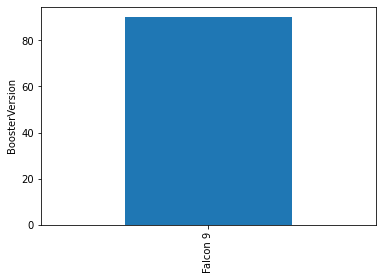

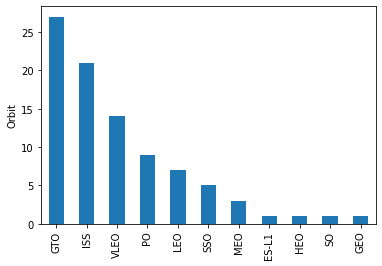

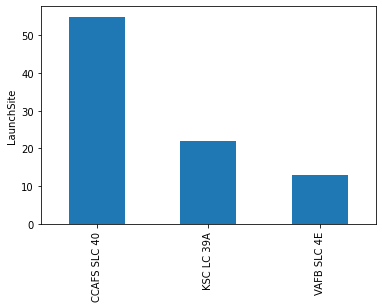

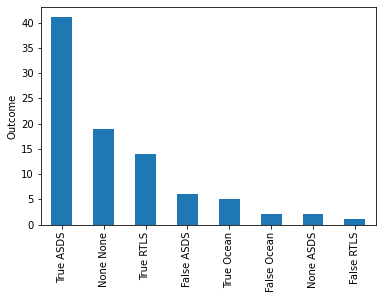

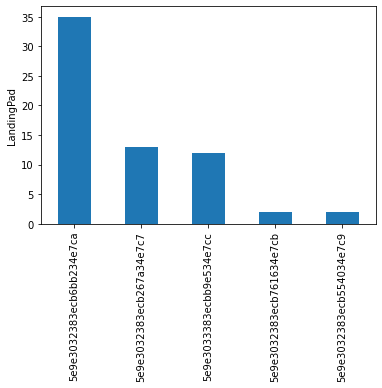

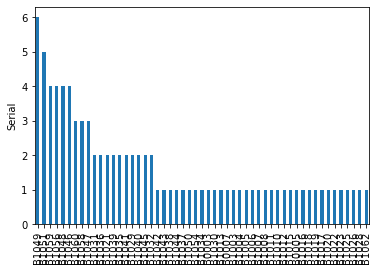

In [10]:
#use for categorical data
for i in range (len(categorical_feat)):
    df[categorical_feat[i]].value_counts().plot(kind="bar")
    plt.ylabel(categorical_feat[i]) 
    plt.show()


In [195]:
df["BoosterVersion"]

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [16]:
# not important information due to its identical data in column
set(df["BoosterVersion"])

{'Falcon 9'}

In [17]:
df["PayloadMass"].describe()


count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

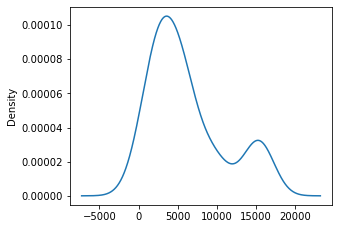

In [18]:
df["PayloadMass"].plot(kind='kde',subplots=True,figsize=(16,8),layout=(2,3), sharex=False)

array([[<AxesSubplot:title={'center':'FlightNumber'}>,
        <AxesSubplot:title={'center':'PayloadMass'}>,
        <AxesSubplot:title={'center':'Flights'}>],
       [<AxesSubplot:title={'center':'Block'}>,
        <AxesSubplot:title={'center':'ReusedCount'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

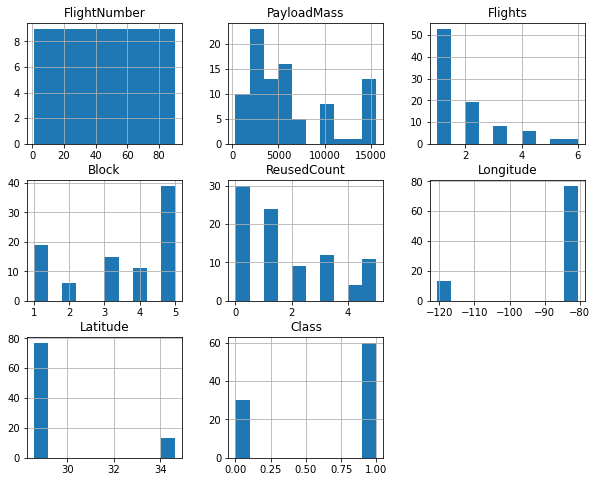

In [19]:
# use for numerical data
df.hist(figsize=[10,8])

In [20]:
df.shape

(90, 18)

In [196]:
df=df.drop(['BoosterVersion','Latitude','Longitude'],axis=1)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     bool   
 7   Reused        90 non-null     bool   
 8   Legs          90 non-null     bool   
 9   LandingPad    64 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


### Visulize the relationship between Flight Numbers and Payload Mass, Launchsite

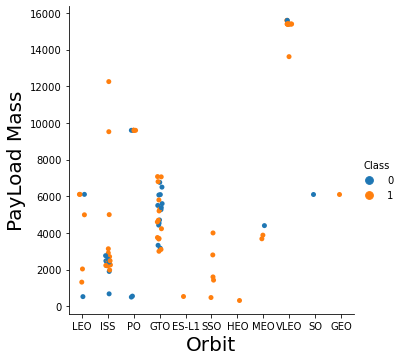

In [23]:
sns.catplot(y='PayloadMass',x='Orbit',hue="Class",data=df,aspect=1)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('PayLoad Mass',fontsize=20)
plt.show()

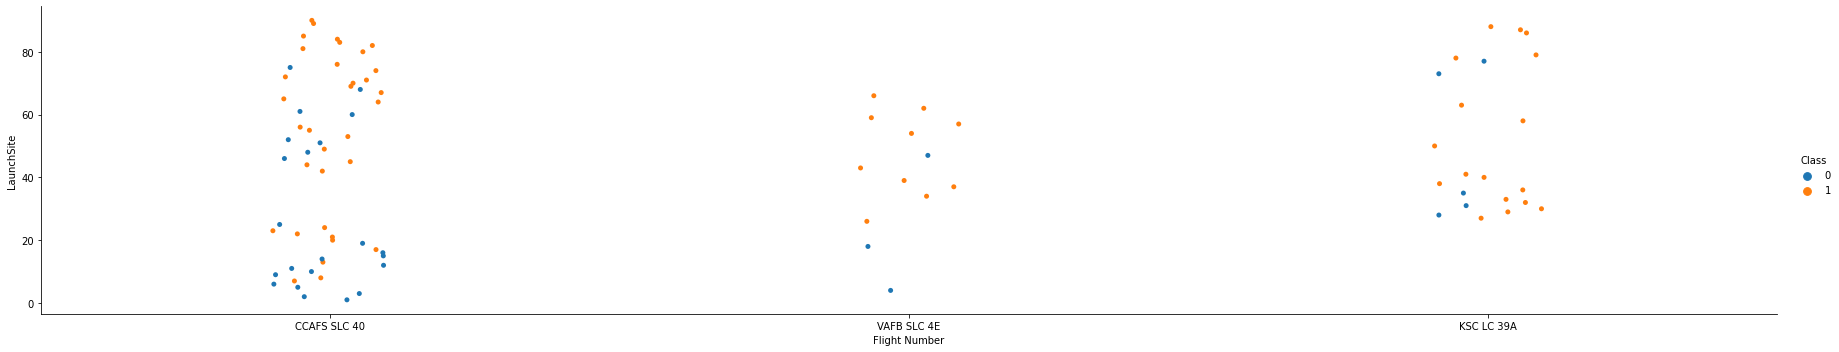

In [24]:
sns.catplot(y='FlightNumber',x='LaunchSite',data=df,hue='Class',aspect=5)
plt.xlabel('Flight Number')
plt.ylabel('LaunchSite')
plt.show()

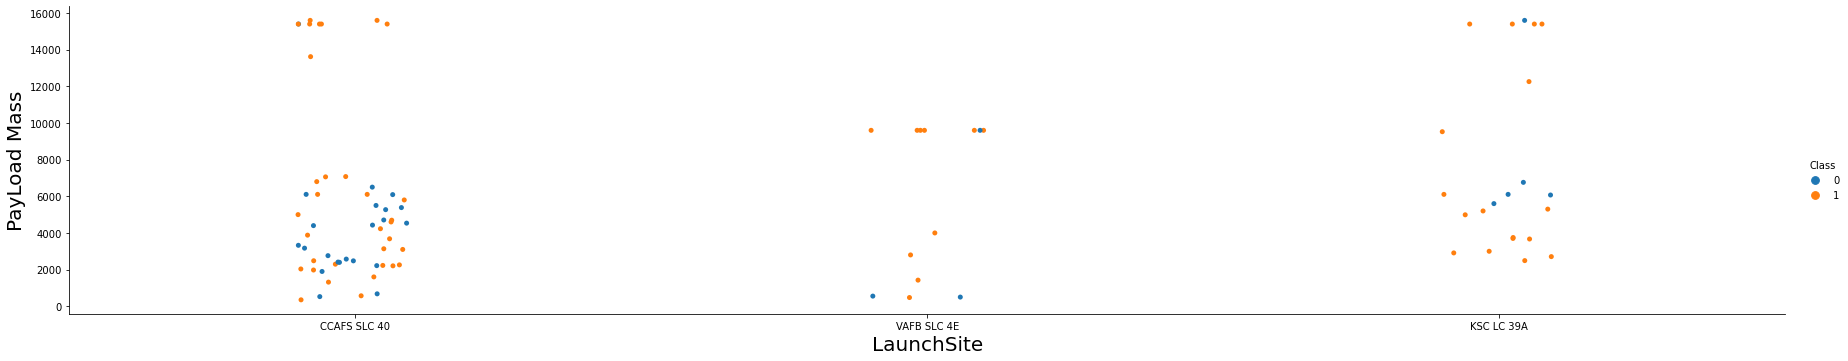

In [25]:
#the most landing in the first site 
sns.catplot(y='PayloadMass',x='LaunchSite',hue="Class",data=df,aspect=5)
plt.xlabel('LaunchSite',fontsize=20)
plt.ylabel('PayLoad Mass',fontsize=20)
plt.show()

## Preprocessing and Cleansing
#### dealing with missing data

* regarding to the domain knowlegde filling out LaunchSite, we can not filling out by max count from value count becuse the max frequency of landing pad is "5e9e3032383ecb6bb234e7ca " however the Orbit is related to this value is VLEO but there are also other orbit for this value. so max count for filling out is not good solution. we can not be sure about the accuracy of VELO for the all orbits of 5e9e3032383ecb6bb234e7ca. so thecnical and domain knowlegde will help.

In [26]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000


In [27]:

df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [11]:
df['LandingPad']=df['LandingPad'].fillna(df['LandingPad'].mode()[0])

In [12]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    61
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [13]:
df[['LandingPad','Orbit']]


,LandingPad,Orbit
0,5e9e3032383ecb6bb234e7ca,LEO
1,5e9e3032383ecb6bb234e7ca,LEO
2,5e9e3032383ecb6bb234e7ca,ISS
3,5e9e3032383ecb6bb234e7ca,PO
4,5e9e3032383ecb6bb234e7ca,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


### Coverting qualitatives to quantitatives

In [14]:
# converting categorical value to numerical

for i in df.columns:
    if df[i].dtypes==object:
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
df.head(90)    



,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,0,6104.959412,5,0,4,1,False,False,False,2,1.0,0,0,-80.577366,28.561857,0
1,2,0,525.000000,5,0,4,1,False,False,False,2,1.0,0,1,-80.577366,28.561857,0
2,3,0,677.000000,4,0,4,1,False,False,False,2,1.0,0,2,-80.577366,28.561857,0
3,4,0,500.000000,7,2,1,1,False,False,False,2,1.0,0,3,-120.610829,34.632093,0
4,5,0,3170.000000,2,0,4,1,False,False,False,2,1.0,0,4,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,True,True,True,2,5.0,2,51,-80.603956,28.608058,1
86,87,0,15400.000000,10,1,5,3,True,True,True,2,5.0,2,49,-80.603956,28.608058,1
87,88,0,15400.000000,10,1,5,6,True,True,True,2,5.0,5,46,-80.603956,28.608058,1
88,89,0,15400.000000,10,0,5,3,True,True,True,4,5.0,2,51,-80.577366,28.561857,1


In [32]:
df.shape

(90, 15)

In [15]:
df['GridFins']=df['GridFins'].astype(int)
df['Reused']=df['Reused'].astype(int)
df['Legs']=df['Legs'].astype(int)   
df

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,0,6104.959412,5,0,4,1,0,0,0,2,1.0,0,0,-80.577366,28.561857,0
1,2,0,525.000000,5,0,4,1,0,0,0,2,1.0,0,1,-80.577366,28.561857,0
2,3,0,677.000000,4,0,4,1,0,0,0,2,1.0,0,2,-80.577366,28.561857,0
3,4,0,500.000000,7,2,1,1,0,0,0,2,1.0,0,3,-120.610829,34.632093,0
4,5,0,3170.000000,2,0,4,1,0,0,0,2,1.0,0,4,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,1,1,1,2,5.0,2,51,-80.603956,28.608058,1
86,87,0,15400.000000,10,1,5,3,1,1,1,2,5.0,2,49,-80.603956,28.608058,1
87,88,0,15400.000000,10,1,5,6,1,1,1,2,5.0,5,46,-80.603956,28.608058,1
88,89,0,15400.000000,10,0,5,3,1,1,1,4,5.0,2,51,-80.577366,28.561857,1


In [16]:
df1=df.drop('Class',axis=1)
df1

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,0,6104.959412,5,0,4,1,0,0,0,2,1.0,0,0,-80.577366,28.561857
1,2,0,525.000000,5,0,4,1,0,0,0,2,1.0,0,1,-80.577366,28.561857
2,3,0,677.000000,4,0,4,1,0,0,0,2,1.0,0,2,-80.577366,28.561857
3,4,0,500.000000,7,2,1,1,0,0,0,2,1.0,0,3,-120.610829,34.632093
4,5,0,3170.000000,2,0,4,1,0,0,0,2,1.0,0,4,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,1,1,1,2,5.0,2,51,-80.603956,28.608058
86,87,0,15400.000000,10,1,5,3,1,1,1,2,5.0,2,49,-80.603956,28.608058
87,88,0,15400.000000,10,1,5,6,1,1,1,2,5.0,5,46,-80.603956,28.608058
88,89,0,15400.000000,10,0,5,3,1,1,1,4,5.0,2,51,-80.577366,28.561857


In [17]:
#standardization
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(df1)
X_df1 = pd.DataFrame(x_scaled,index=df1.index,columns=df1.columns)
X_df1

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,-1.712912,0.0,-1.948145e-16,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.174106,0.411430,-0.417073
1,-1.674419,0.0,-1.195232e+00,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.107027,0.411430,-0.417073
2,-1.635927,0.0,-1.162673e+00,-0.341929,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.039948,0.411430,-0.417073
3,-1.597434,0.0,-1.200587e+00,0.672585,2.000000,-2.117124,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.972869,-2.433736,2.433637
4,-1.558942,0.0,-6.286706e-01,-1.018272,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.905790,0.411430,-0.417073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.0,1.991005e+00,1.687100,0.636364,0.199486,0.174991,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.246925,0.409541,-0.395376
86,1.597434,0.0,1.991005e+00,1.687100,0.636364,0.199486,1.003894,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.112767,0.409541,-0.395376
87,1.635927,0.0,1.991005e+00,1.687100,0.636364,0.199486,3.490605,0.534522,1.196843,0.517306,0.020677,0.945537,1.966480,0.911530,0.409541,-0.395376
88,1.674419,0.0,1.991005e+00,1.687100,-0.727273,0.199486,1.003894,0.534522,1.196843,0.517306,1.881596,0.945537,0.202528,1.246925,0.411430,-0.417073


In [18]:
df_preproccessd=pd.concat([X_df1,df['Class']],axis=1)
df_preproccessd

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,-1.712912,0.0,-1.948145e-16,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.174106,0.411430,-0.417073,0
1,-1.674419,0.0,-1.195232e+00,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.107027,0.411430,-0.417073,0
2,-1.635927,0.0,-1.162673e+00,-0.341929,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.039948,0.411430,-0.417073,0
3,-1.597434,0.0,-1.200587e+00,0.672585,2.000000,-2.117124,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.972869,-2.433736,2.433637,0
4,-1.558942,0.0,-6.286706e-01,-1.018272,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.905790,0.411430,-0.417073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.0,1.991005e+00,1.687100,0.636364,0.199486,0.174991,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.246925,0.409541,-0.395376,1
86,1.597434,0.0,1.991005e+00,1.687100,0.636364,0.199486,1.003894,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.112767,0.409541,-0.395376,1
87,1.635927,0.0,1.991005e+00,1.687100,0.636364,0.199486,3.490605,0.534522,1.196843,0.517306,0.020677,0.945537,1.966480,0.911530,0.409541,-0.395376,1
88,1.674419,0.0,1.991005e+00,1.687100,-0.727273,0.199486,1.003894,0.534522,1.196843,0.517306,1.881596,0.945537,0.202528,1.246925,0.411430,-0.417073,1


## Train/Test Split & Normalization
these are a supervised learning for classification:
* LogisticModel
* K nearest neighbors(KNN)
* SVM
** Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 10. The training data and test data should be assigned to the following labels.

In [19]:
X=df_preproccessd.drop('Class',axis=1)
Y=df_preproccessd['Class']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)

Create a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>param0</code>.


In [27]:
#Logisticregression
logmodel=LogisticRegression()
param0={'C':[.001,.01,.1]}
logreg_cv=GridSearchCV(logmodel,param0,cv=10)


In [28]:
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1]})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [29]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.1}
0.9321428571428573


In [30]:
logreg_cv.score(X_test,Y_test)

0.8333333333333334

In [31]:
pred0=logreg_cv.predict(X_test)

In [32]:
print(accuracy_score(Y_test,pred0))
print(classification_report(Y_test,pred0))

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



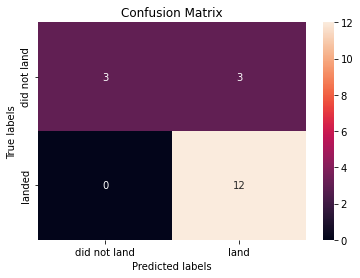

In [33]:
heat_confusion(Y_test,pred0)

In [34]:
accuracy=[]
methods=[]
accuracy.append(logreg_cv.score(X_test,Y_test))
methods.append('LogReg_cv')
logreg_cv.score(X_test,Y_test)

0.8333333333333334

In [44]:
#KNN alogrithem
knn=KNeighborsClassifier(n_neighbors=9)
parameters={'n_neighbors':[1,2,4,5,7,8,9,10]}
#tuned hyperparameters
knn=GridSearchCV(knn,parameters)
knn.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 4, 5, 7, 8, 9, 10]})

In [45]:
print("tuned hyperparameters:(best parameters)", knn.best_params_, knn.best_score_)

tuned hyperparameters:(best parameters) {'n_neighbors': 4} 0.9057142857142857


In [47]:
knn.score(X_test,Y_test)


0.7777777777777778

In [48]:
pred1=knn.predict(X_test)

In [49]:
print(confusion_matrix(Y_test,pred1),classification_report(Y_test,pred1),accuracy_score(Y_test,pred1))

[[ 3  3]
 [ 1 11]]               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18
 0.7777777777777778


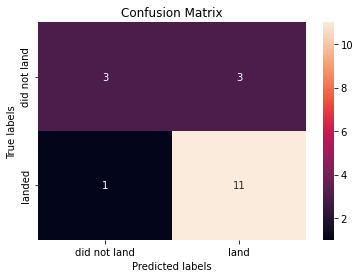

In [50]:
heat_confusion(Y_test,pred1)

In [51]:

accuracy.append(knn.score(X_test,Y_test))
methods.append('KNN')
knn.score(X_test,Y_test)

0.7777777777777778

In [61]:
#Desion Tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1,2, 4],
     'min_samples_split': [3, 6, 10]}

tree = DecisionTreeClassifier()

In [62]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 6, 10],
                         'splitter': ['best', 'random']})

In [63]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
accuracy : 0.9607142857142857


In [64]:
tree_cv.score(X_test,Y_test)

0.7777777777777778

In [65]:
pred3=tree_cv.predict(X_test)

In [66]:
print((pred3)
      ,Y_test)

[0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1] 76    0
26    1
3     0
35    1
19    1
14    0
37    1
68    1
38    1
21    1
61    1
63    1
48    1
60    0
82    1
41    1
59    0
45    0
Name: Class, dtype: int64


In [67]:
confusion_matrix(Y_test,pred3)

array([[ 4,  2],
       [ 2, 10]], dtype=int64)

In [68]:
accuracy_score(Y_test,pred3)

0.7777777777777778

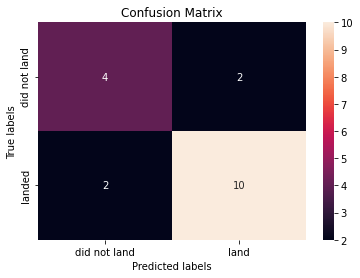

In [69]:
heat_confusion(Y_test,pred3)

In [70]:

accuracy.append(tree_cv.score(X_test,Y_test))
methods.append('DT')
tree_cv.score(X_test,Y_test)

0.7777777777777778

In [92]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
param_rf={'criterion': ['gini', 'entropy'],
     'min_samples_leaf': [ 2, 4],
     'min_samples_split': [2,5, 8]}
RFC=RandomForestClassifier()

In [93]:
rf_cv=GridSearchCV(RFC,param_rf,cv=3)
rf_cv.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 8]})

In [94]:
print(rf_cv.best_params_,rf_cv.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9583333333333334


In [95]:
pred4=rf_cv.predict(X_test)

In [96]:
print(Y_test,pred4)

76    0
26    1
3     0
35    1
19    1
14    0
37    1
68    1
38    1
21    1
61    1
63    1
48    1
60    0
82    1
41    1
59    0
45    0
Name: Class, dtype: int64 [0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0]


In [97]:
confusion_matrix(Y_test,pred4)

array([[ 6,  0],
       [ 0, 12]], dtype=int64)

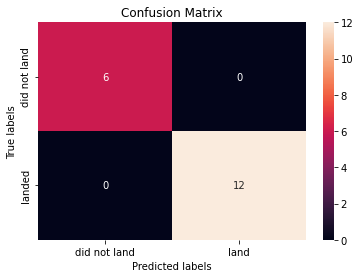

In [98]:
heat_confusion(Y_test,pred4)

In [99]:

accuracy.append(rf_cv.score(X_test,Y_test))
methods.append('RF')
rf_cv.score(X_test,Y_test)

1.0

In [100]:
#SVM model
svm=SVC()

In [108]:
param_svm={'C':[0.25,.5,1.5],'kernel': ['poly', 'rbf', 'sigmoid']}

In [109]:
svm_cv=GridSearchCV(svm,param_svm)
svm_cv.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1.5],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [110]:
svm_cv.best_params_

{'C': 1.5, 'kernel': 'sigmoid'}

In [111]:
svm_cv.best_score_

0.9733333333333334

In [112]:
pred5=svm_cv.predict(X_test)

In [114]:
print(confusion_matrix(Y_test,pred5),accuracy_score(Y_test,pred5))

[[ 5  1]
 [ 0 12]] 0.9444444444444444


In [115]:
accuracy_score(Y_test,pred5)

0.9444444444444444

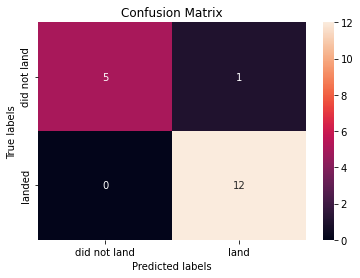

In [116]:
heat_confusion(Y_test,pred5)

In [117]:

accuracy.append(svm_cv.score(X_test,Y_test))
methods.append('SVM')
svm_cv.score(X_test,Y_test)

0.9444444444444444

Find the method performs best:


In [118]:
print(methods,accuracy)

['LogReg_cv', 'KNN', 'DT', 'RF', 'RF', 'RF', 'RF', 'SVM'] [0.8333333333333334, 0.7777777777777778, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 0.9444444444444444]


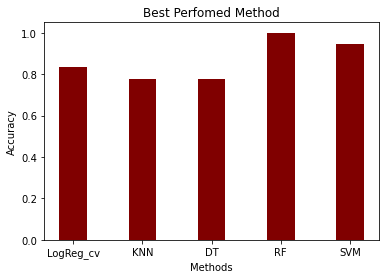

In [119]:
# creating the bar plot
plt.bar(methods, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

Text(0.5, 1.0, 'under ROC')

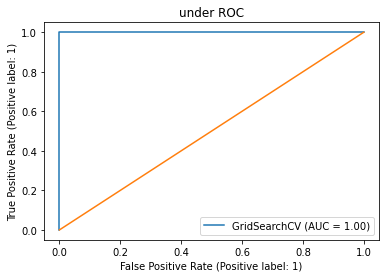

In [121]:
#ROC curve
RocCurveDisplay.from_estimator(svm_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('under ROC')